In [1]:
import pandas as pd
from sklearn import datasets
from typing import List
import math
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('preproc.csv')
train_df = df.iloc[:750,:]
test_df = df.iloc[750:,:]

train_x = train_df[["duration_ms", "danceability", "energy","speechiness","acousticness","instrumentalness","liveness"]]
train_y = train_df[["popularity"]]
test_x = test_df[["duration_ms", "danceability", "energy","speechiness","acousticness","instrumentalness","liveness"]]
test_y = test_df[["popularity"]]

In [3]:
ref_array = ["duration_ms", "danceability", "energy","speechiness","acousticness","instrumentalness","liveness"]

In [4]:
mse_array = []
train_array =[]
test_array = []
count_array = [2,3,4,5,6,7,8,9]

# calculate correlation between attributes and popularity

In [5]:
for x in ref_array:
    x_df = train_df[x].tolist()
    r = np.corrcoef(x_df,train_df['popularity'].tolist())
    print(f"correlation between {x} and popularity")
    print(r[0,1])
    print()

correlation between duration_ms and popularity
0.030124009212390276

correlation between danceability and popularity
0.05366472092800015

correlation between energy and popularity
0.021323385034282705

correlation between speechiness and popularity
-0.08592821455487924

correlation between acousticness and popularity
-0.07755728759297068

correlation between instrumentalness and popularity
-0.13337644451688224

correlation between liveness and popularity
-0.032419688263448404



# Train model for polynomial degrees 2-9 on all explantory variables

In [6]:
x = 2 #represents the polynomial degree
while x < 10:
    #model
    poly = PolynomialFeatures(degree=x) 
    trainx_poly= poly.fit_transform(train_x)

    regr_quad = linear_model.LinearRegression()
    regr_quad.fit(trainx_poly, train_y)

    y_train_pred = regr_quad.predict(trainx_poly) #evaluate model on training set
    y_test_pred = regr_quad.predict(poly.fit_transform(test_x)) #evaluate model on testing set

    print(f'Degree = {x}')

    mse = mean_squared_error(test_y, y_test_pred)
    mse_array.append(mse)
    print(f'Mean squared error: {mse}')

    train = r2_score(train_y, y_train_pred)
    train_array.append(train)
    print(f"Training R-Squared = {train}")


    test = r2_score(test_y,  y_test_pred)
    test_array.append(test)
    print(f"Testing  R-Squared = {test}")
    
    x+=1

Degree = 2
Mean squared error: 431.71212556065257
Training R-Squared = 0.08653752574278151
Testing  R-Squared = 0.016086271962806764
Degree = 3
Mean squared error: 434.59812171064567
Training R-Squared = 0.09108657377627583
Testing  R-Squared = 0.009508807344797754
Degree = 4
Mean squared error: 461.2780745206381
Training R-Squared = 0.08641109764038968
Testing  R-Squared = -0.0512973879851224
Degree = 5
Mean squared error: 534.1477904756043
Training R-Squared = 0.07053605458549683
Testing  R-Squared = -0.2173745251356034
Degree = 6
Mean squared error: 622.0322976402999
Training R-Squared = 0.04999818753971197
Testing  R-Squared = -0.41767182502920686
Degree = 7
Mean squared error: 803.9391358848712
Training R-Squared = 0.03901925896630598
Testing  R-Squared = -0.8322551197194767
Degree = 8
Mean squared error: 973.3415928046627
Training R-Squared = 0.02587462329598167
Testing  R-Squared = -1.218339718826237
Degree = 9
Mean squared error: 612.7206419589601
Training R-Squared = 0.0177988

In [7]:
import matplotlib.pyplot as plt
import numpy as np
# if using a Jupyter notebook, include:
%matplotlib inline

Text(0.5, 1.0, 'Degree Value vs R^2 Value of Training Set')

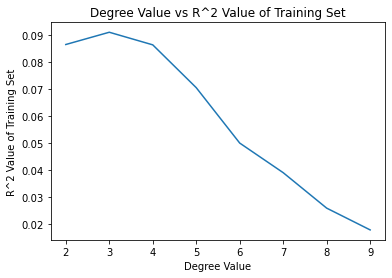

In [8]:
plt.plot(count_array, train_array)
plt.xlabel("Degree Value")
plt.ylabel("R^2 Value of Training Set")
plt.title("Degree Value vs R^2 Value of Training Set")

Text(0.5, 1.0, 'Degree Value vs R^2 Value of Testing Set')

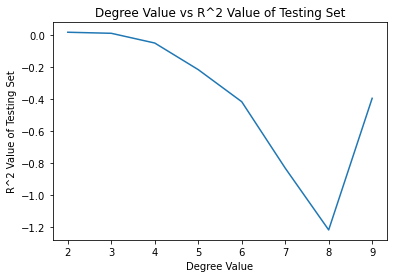

In [9]:
plt.plot(count_array, test_array)

plt.xlabel("Degree Value")
plt.ylabel("R^2 Value of Testing Set")
plt.title("Degree Value vs R^2 Value of Testing Set")

Text(0.5, 1.0, 'Degree Value vs MSE')

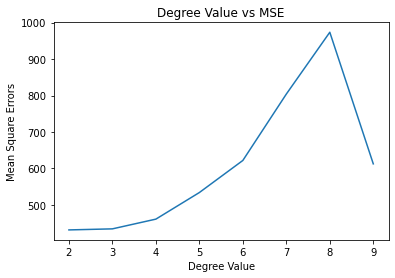

In [10]:
plt.plot(count_array, mse_array)
plt.xlabel("Degree Value")
plt.ylabel("Mean Square Errors")
plt.title("Degree Value vs MSE")

# Train model for polynomial degrees 2-9 on top 3 explanatory variables with the highest correlation values

In [11]:
split_train_x = train_df[['liveness', 'instrumentalness','speechiness']]
split_test_x = test_df[['liveness', 'instrumentalness','speechiness']]
mse_array = []
train_array =[]
test_array = []


In [12]:
x = 2
while x < 10:
    poly = PolynomialFeatures(degree=x) 
    trainx_poly= poly.fit_transform(split_train_x)

    regr_quad = linear_model.LinearRegression()
    regr_quad.fit(trainx_poly, train_y)

    y_train_pred = regr_quad.predict(trainx_poly)
    y_test_pred = regr_quad.predict(poly.fit_transform(split_test_x))

    print(f'Degree = {x}')

    mse = mean_squared_error(test_y, y_test_pred)
    mse_array.append(mse)
    print(f'Mean squared error: {mse}')

    train = r2_score(train_y, y_train_pred)
    train_array.append(train)
    print(f"Training R-Squared = {train}")


    test = r2_score(test_y,  y_test_pred)
    test_array.append(test)
    print(f"Testing  R-Squared = {test}")
    
    x+=1

Degree = 2
Mean squared error: 436.7184833514454
Training R-Squared = 0.03257276074536675
Testing  R-Squared = 0.004676297894022019
Degree = 3
Mean squared error: 442.5400366825323
Training R-Squared = 0.042840306349470114
Testing  R-Squared = -0.008591585729859075
Degree = 4
Mean squared error: 451.1350471818179
Training R-Squared = 0.05123891566078531
Testing  R-Squared = -0.02818044673738429
Degree = 5
Mean squared error: 646.1975076871139
Training R-Squared = 0.09374213388521191
Testing  R-Squared = -0.4727466781505658
Degree = 6
Mean squared error: 9518.276783745117
Training R-Squared = 0.11753090741551608
Testing  R-Squared = -20.693074250861603
Degree = 7
Mean squared error: 4052730.216641938
Training R-Squared = 0.1618302013383327
Testing  R-Squared = -9235.564506977067
Degree = 8
Mean squared error: 592746837.7953204
Training R-Squared = 0.19549160500433904
Testing  R-Squared = -1350926.4269284196
Degree = 9
Mean squared error: 915554303117.036
Training R-Squared = -2.42763743

Text(0.5, 1.0, 'Degree Value vs R^2 Value of Training Set')

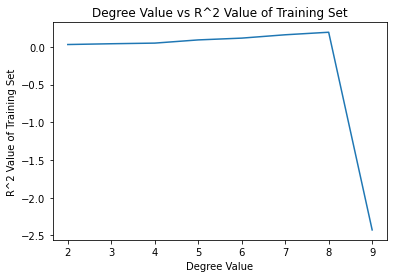

In [13]:
plt.plot(count_array, train_array)
plt.xlabel("Degree Value")
plt.ylabel("R^2 Value of Training Set")
plt.title("Degree Value vs R^2 Value of Training Set")

Text(0.5, 1.0, 'Degree Value vs R^2 Value of Testing Set')

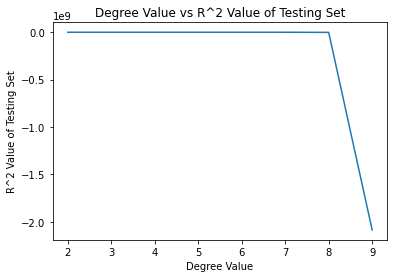

In [14]:
plt.plot(count_array, test_array)

plt.xlabel("Degree Value")
plt.ylabel("R^2 Value of Testing Set")
plt.title("Degree Value vs R^2 Value of Testing Set")

Text(0.5, 1.0, 'Degree Value vs MSE')

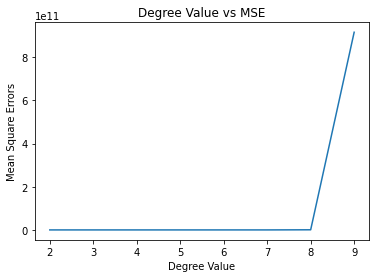

In [15]:
plt.plot(count_array, mse_array)
plt.xlabel("Degree Value")
plt.ylabel("Mean Square Errors")
plt.title("Degree Value vs MSE")